In [176]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

(1) загрузите датасет iris (уже использовали при изучении Seaborn)

In [177]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [178]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [180]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [181]:
df['class'] = df['target'].map({
    0: iris.target_names[0],
    1: iris.target_names[1],
    2: iris.target_names[2]
})

In [182]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


(2) дайте описание каждого признака и целевой переменной

Признаки:

    sepal length (cm) - длина чашелистика
    sepal width (cm) - ширина чашелистика
    petal length (cm) - длина лепестка
    petal width (cm) - ширина лепестка

Целевая переменная:

    Вид ириса (3 класса):

        0: Iris setosa
        1: Iris versicolor
        2: Iris virginica


(3) как наблюдения распределились по классам? (сколько в каждом классе?). Для ответа используйте метод value_counts().

In [183]:
df.value_counts('class')

class
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

(4) Разделите данные на признаки и ответы, а затем на обучающую и тестовую выборки.

In [184]:
df = df.drop('class', axis = 1)

In [185]:
X = df.drop('target', axis =1)
y = df['target']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=40)

(5) Обучите модель логистической регрессии (LogisticRegression или LogisticRegression_CV, дайте описание гиперпараметров модели).

In [187]:
lr_model = LogisticRegression(solver='lbfgs', penalty='l2', class_weight=None, C=1.0)

In [188]:
lr_model.fit(X_train, y_train)
train_score = lr_model.score(X_train, y_train)
train_score

0.97

In [189]:
test_score = lr_model.score(X_test, y_test)
test_score

1.0

(6) С помощью метода predict_proba получите вероятности принадлежности классам объектов тестовой выборки (вывод оформите в два столбца: значение вероятности, верный ответ).

In [190]:
proba = lr_model.predict_proba(X_test)
proba_df = pd.DataFrame(proba, columns=[f'prob_class_{i}' for i in range(proba.shape[1])])
proba_df['true_class'] = y_test.reset_index(drop=True)
proba_df_formatted = proba_df.iloc[:, :-1].map(lambda x: '{:.6f}'.format(x))
proba_df_formatted['true_class'] = proba_df['true_class']
proba_df_formatted.head()

,prob_class_0,prob_class_1,prob_class_2,true_class
0,0.979344,0.020656,0.000000,0
1,0.012374,0.765737,0.221890,1
2,0.000147,0.091916,0.907936,2
3,0.000000,0.008445,0.991555,2
4,0.027374,0.916387,0.056239,1


 (7) получите матрицу несоответствий / ошибок (confusion matrix). Дайте пояснения.

In [191]:
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_labels = iris.target_names[y_test]
pred_labels = iris.target_names[y_pred]
conf_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
conf_df.index.name = 'True'
conf_df.columns.name = 'Predicted'

print("Confusion Matrix:")
print(conf_df)

Confusion Matrix:
Predicted   setosa  versicolor  virginica
True                                     
setosa          18           0          0
versicolor       0          15          0
virginica        0           0         17


(8) Получите оценки качества классификации: доля правильных ответов, точность, полнота, F-меру, AUC. Дайте пояснения.

In [192]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, lr_model.predict_proba(X_test), multi_class='ovr', average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC: 1.0000


(9) Определите 2 признака с наибольшей дисперсией и постройте модель классификации. Сильно ли ухудшились оценки качества модели?

In [193]:
top_std_features = df.describe().T['std'].nlargest(2).index.to_list()
top_std_features

['petal length (cm)', 'sepal length (cm)']

In [194]:
df_std = df[[*top_std_features, 'target']]
df_std

,petal length (cm),sepal length (cm),target
0,1.4,5.1,0
1,1.4,4.9,0
2,1.3,4.7,0
3,1.5,4.6,0
4,1.4,5.0,0
...,...,...,...
145,5.2,6.7,2
146,5.0,6.3,2
147,5.2,6.5,2
148,5.4,6.2,2


In [195]:
X = df_std.drop('target', axis =1)
y = df_std['target']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=40)

In [197]:
lr_model.fit(X_train, y_train)
std_train_score = lr_model.score(X_train, y_train)
std_train_score

0.97

In [198]:
std_test_score = lr_model.score(X_test, y_test)
std_test_score

0.94

In [199]:
print('Разница score train', train_score - std_train_score)

Разница score train 0.0


In [200]:
print('Разница score test', test_score - std_test_score)

Разница score test 0.06000000000000005


(10) Отобразите наблюдения на плоскости каждый своим цветом. Попробуйте взять в качестве двух признаков длину и ширину лепестков. Как они отобразились на рисунке? Попробуйте взять два признака с наименьшей корреляцией.

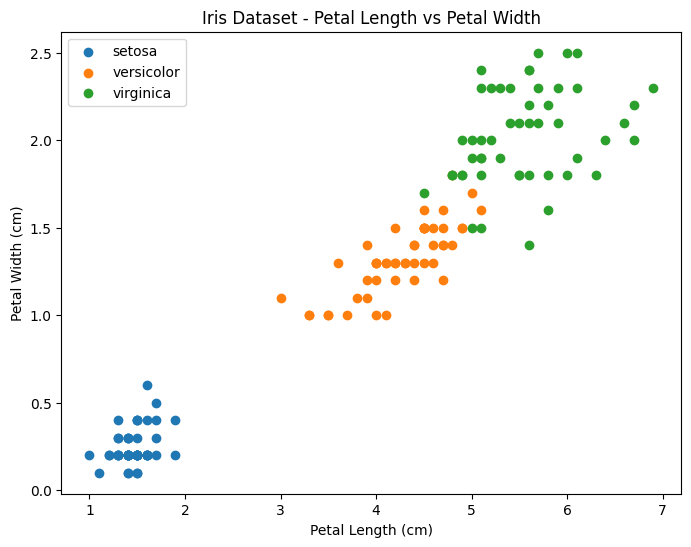

In [201]:
plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(df[df['target'] == i]['petal length (cm)'], df[df['target'] == i]['petal width (cm)'], label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()

In [202]:
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  



Two features with the lowest correlation: ('petal width (cm)', 'sepal width (cm)')


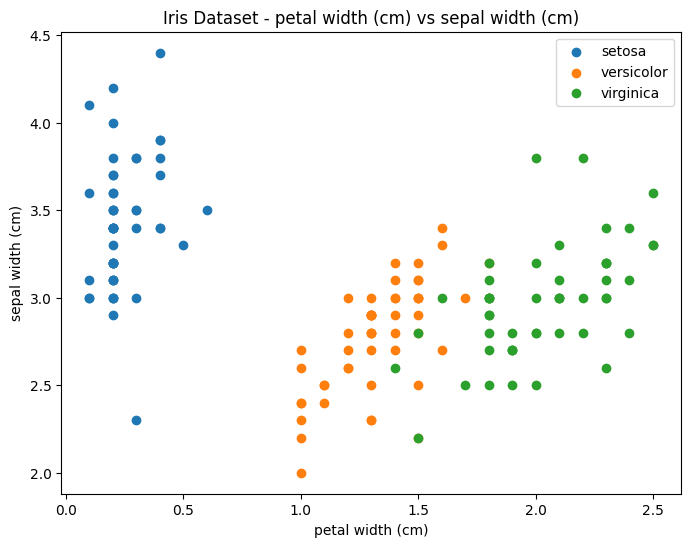

In [203]:
min_corr = corr_matrix.abs().unstack().sort_values().drop_duplicates()
min_corr_features = min_corr.index[1]

print(f"\nTwo features with the lowest correlation: {min_corr_features}")

plt.figure(figsize=(8, 6))
for i, species in enumerate(iris.target_names):
    plt.scatter(df[df['target'] == i][min_corr_features[0]], df[df['target'] == i][min_corr_features[1]], label=species)
plt.xlabel(min_corr_features[0])
plt.ylabel(min_corr_features[1])
plt.legend()
plt.title(f'Iris Dataset - {min_corr_features[0]} vs {min_corr_features[1]}')
plt.show()

 (11) Модель LogisticRegression для классификации использует стратегию один против всех в случае нескольких классов. Постарайтесь отобразить на графике наблюдения (каждый класс своим цветом) и гиперплоскости (в 2Д - прямые), разделяющие эти классы. Можно использовать принцип построения линий уровня для функции 2-х перемнных (см. прилагаемые материалы). 

In [204]:
X = df.drop(['target', 'sepal length (cm)', 'sepal width (cm)'], axis =1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=40)

lr_model = LogisticRegression(solver='lbfgs', penalty='l2', class_weight=None, C=1.0)
lr_model.fit(X_train, y_train)
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
print(train_score)
print(test_score)

0.96
0.96


/home/nockerox/Desktop/ml-learn/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


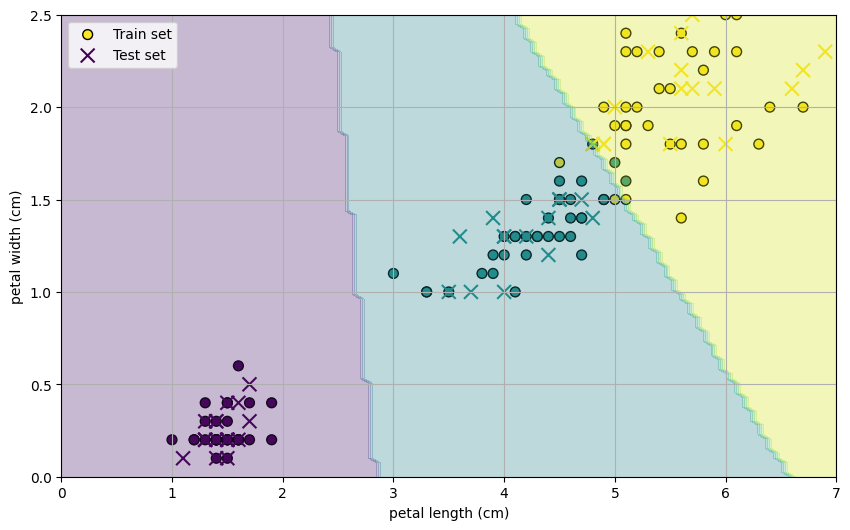

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Train set')
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Test set')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

xx, yy = np.meshgrid(np.linspace(0, 7, 100), np.linspace(0, 2.5, 100))
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

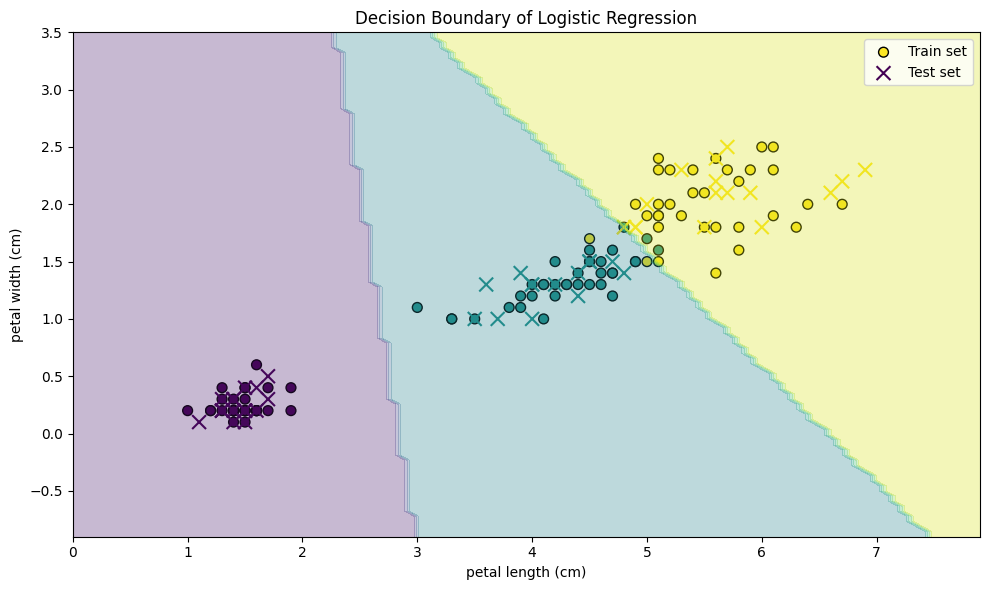

In [206]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50, label='Train set')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Test set')

disp = DecisionBoundaryDisplay.from_estimator(lr_model, X, cmap='viridis', alpha=0.3, ax=ax)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_title("Decision Boundary of Logistic Regression")
ax.legend()

plt.tight_layout()
plt.show()